# Data Science Project
## Analysis of factors influencing Life Expectancy

Loading Data into DataFrame

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.feature_selection import SelectKBest,chi2
from tensorflow import keras
import math

In [14]:
PreDataLifeExpectancy = pd.read_csv('/home/jayanth/Documents/Data_Science/DSC_Project/data/Life Expectancy Data.csv')
DataLifeExpectancy = PreDataLifeExpectancy.set_index(['Country','Year'])

#DataLifeExpectancy.loc[("India",2010),"Status"]

In [2]:
# Correlation using Pearson

# +1 --> Total Positive Linear Correlation
#  0 --> No Linear Correlation
# -1 --> Total Negative Lineat Correlatinon

PearsonCorrelationMatrix = DataLifeExpectancy.corr("pearson")
PearsonCorrelationMatrix

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373
Polio,0.465556,-0.274823,-0.170689,0.221734,0.147259,0.486171,-0.136166,0.284569,-0.188720,1.000000,0.137330,0.673553,-0.159560,0.211976,-0.038540,-0.221823,-0.222592,0.381078,0.417866


In [3]:
DataLifeExpectancyIndia = DataLifeExpectancy.loc[("India")]

PearsonCorrelationMatrixIndia = DataLifeExpectancyIndia.corr("pearson")
PearsonCorrelationMatrixIndia

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.274277,-0.994640,0.963908,0.521725,0.792038,0.125425,0.998254,-0.998021,0.984122,0.467931,0.526268,-0.869180,0.763034,-0.007515,-0.964594,-0.994588,0.997996,0.991049
Adult Mortality,-0.274277,1.000000,0.253932,-0.259294,0.026396,0.056090,0.015514,-0.245907,0.232232,-0.226415,0.150492,0.221235,0.092895,0.098195,-0.144574,0.344340,0.295850,-0.291333,-0.340523
infant deaths,-0.994640,0.253932,1.000000,-0.960787,-0.532033,-0.768037,-0.096223,-0.993951,0.993754,-0.986429,-0.449821,-0.487356,0.858343,-0.767129,0.013209,0.956793,0.987866,-0.996325,-0.989530
Alcohol,0.963908,-0.259294,-0.960787,1.000000,0.774589,0.727830,-0.264025,0.965524,-0.959828,0.971753,0.480732,0.519194,-0.948829,0.757993,-0.137479,-0.876480,-0.934761,0.960465,0.947543
percentage expenditure,0.521725,0.026396,-0.532033,0.774589,1.000000,0.275367,-0.275003,0.508945,-0.508346,0.523062,0.548531,0.237547,-0.517623,0.755693,0.018183,-0.450079,-0.477955,0.516146,0.529551
Hepatitis B,0.792038,0.056090,-0.768037,0.727830,0.275367,1.000000,0.401574,0.800007,-0.798823,0.768665,0.613553,0.386535,-0.694026,0.637237,-0.382687,-0.752634,-0.794882,0.786959,0.761901
Measles,0.125425,0.015514,-0.096223,-0.264025,-0.275003,0.401574,1.000000,0.155052,-0.142713,0.108927,0.189320,0.069713,0.009496,0.053134,0.303176,-0.160437,-0.183164,0.132153,0.092969
BMI,0.998254,-0.245907,-0.993951,0.965524,0.508945,0.800007,0.155052,1.000000,-0.998137,0.986717,0.497378,0.526800,-0.867831,0.773887,-0.020995,-0.955633,-0.993122,0.997678,0.987777
under-five deaths,-0.998021,0.232232,0.993754,-0.959828,-0.508346,-0.798823,-0.142713,-0.998137,1.000000,-0.980675,-0.480053,-0.529973,0.863861,-0.765381,0.002047,0.964832,0.994889,-0.995511,-0.986896
Polio,0.984122,-0.226415,-0.986429,0.971753,0.523062,0.768665,0.108927,0.986717,-0.980675,1.000000,0.509703,0.552216,-0.896319,0.767795,-0.061401,-0.917436,-0.971700,0.986446,0.976280


In [4]:
DataLifeExpectancyChina = DataLifeExpectancy.loc[("China")]

PearsonCorrelationMatrixChina = DataLifeExpectancyChina.corr("pearson")
PearsonCorrelationMatrixChina

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000e+00,0.475455,-0.998463,8.770610e-01,9.375067e-03,0.824246,-0.438700,2.805363e-01,-0.998436,0.908508,6.312584e-01,0.925067,1.391951e-15,5.096245e-01,-0.208472,-9.914010e-01,-9.768958e-01,9.860143e-01,9.696810e-01
Adult Mortality,4.754545e-01,1.000000,-0.491169,4.887850e-01,1.007712e-01,0.323160,-0.014461,-9.743865e-02,-0.483910,0.594425,1.751771e-01,0.566038,0.000000e+00,3.454399e-01,0.406274,-4.685516e-01,-4.868131e-01,5.100746e-01,5.491575e-01
infant deaths,-9.984629e-01,-0.491169,1.000000,-8.962056e-01,7.013199e-04,-0.819556,0.449569,-2.595723e-01,0.999211,-0.924479,-6.313984e-01,-0.939137,0.000000e+00,-5.268830e-01,0.178677,9.947190e-01,9.814574e-01,-9.909824e-01,-9.774382e-01
Alcohol,8.770610e-01,0.488785,-0.896206,1.000000e+00,-9.879656e-02,0.623470,-0.675886,-2.739106e-02,-0.881475,0.916363,7.251450e-01,0.940841,9.891310e-16,6.330007e-01,-0.102453,-9.247397e-01,-9.474051e-01,9.403771e-01,9.505389e-01
percentage expenditure,9.375067e-03,0.100771,0.000701,-9.879656e-02,1.000000e+00,0.048060,0.301739,1.460408e-01,-0.014524,-0.108933,-2.122215e-01,-0.123738,1.669168e-17,3.342096e-01,0.268577,5.283238e-02,5.979340e-02,-5.713968e-02,-7.735415e-02
Hepatitis B,8.242457e-01,0.323160,-0.819556,6.234702e-01,4.806015e-02,1.000000,-0.146124,3.655084e-01,-0.833100,0.745865,3.797587e-01,0.747964,0.000000e+00,3.649573e-01,-0.195757,-7.865730e-01,-7.476872e-01,7.738087e-01,7.586596e-01
Measles,-4.387001e-01,-0.014461,0.449569,-6.758862e-01,3.017387e-01,-0.146124,1.000000,2.497508e-01,0.429057,-0.439001,-7.088176e-01,-0.498346,0.000000e+00,-3.295659e-01,0.448007,5.078034e-01,5.380103e-01,-4.984870e-01,-4.933737e-01
BMI,2.805363e-01,-0.097439,-0.259572,-2.739106e-02,1.460408e-01,0.365508,0.249751,1.000000e+00,-0.275548,0.188704,-1.399846e-02,0.189027,-1.166594e-16,9.386672e-02,-0.171368,-2.110199e-01,-1.871097e-01,2.309704e-01,2.646133e-01
under-five deaths,-9.984355e-01,-0.483910,0.999211,-8.814755e-01,-1.452360e-02,-0.833100,0.429057,-2.755479e-01,1.000000,-0.921620,-6.162252e-01,-0.935072,0.000000e+00,-5.236418e-01,0.180345,9.905316e-01,9.734912e-01,-9.853018e-01,-9.709386e-01
Polio,9.085077e-01,0.594425,-0.924479,9.163632e-01,-1.089327e-01,0.745865,-0.439001,1.887040e-01,-0.921620,1.000000,6.023616e-01,0.994770,0.000000e+00,5.432878e-01,0.016923,-9.191837e-01,-9.091161e-01,9.353783e-01,9.525571e-01


In [5]:
DataLifeExpectancyUSA = DataLifeExpectancy.loc[("United States of America")]

PearsonCorrelationMatrixUSA = DataLifeExpectancyUSA.corr("pearson")

++PearsonCorrelationMatrixUSA

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000e+00,-0.901502,-0.917903,9.097630e-01,NaN,0.139607,0.491022,6.596335e-01,-0.911683,0.570562,0.944620,0.042974,1.762851e-14,NaN,NaN,-2.028131e-01,-4.043722e-01,NaN,NaN
Adult Mortality,-9.015021e-01,1.000000,0.811472,-8.268580e-01,NaN,-0.068473,-0.388730,-5.225620e-01,0.799721,-0.462884,-0.847953,0.003927,0.000000e+00,NaN,NaN,2.214329e-01,2.955835e-01,NaN,NaN
infant deaths,-9.179026e-01,0.811472,1.000000,-7.392155e-01,NaN,0.033351,-0.595320,-4.481816e-01,0.988917,-0.365276,-0.822361,0.281513,0.000000e+00,NaN,NaN,-6.399222e-02,2.369025e-01,NaN,NaN
Alcohol,9.097630e-01,-0.826858,-0.739216,1.000000e+00,NaN,0.150815,0.389852,7.458561e-01,-0.757778,0.630427,0.829726,0.221634,-5.299593e-15,NaN,NaN,-5.302233e-01,-4.908124e-01,NaN,NaN
percentage expenditure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatitis B,1.396073e-01,-0.068473,0.033351,1.508154e-01,NaN,1.000000,0.154159,4.278626e-01,0.034397,0.451268,0.145827,0.530499,0.000000e+00,NaN,NaN,-1.815165e-01,-6.821946e-01,NaN,NaN
Measles,4.910216e-01,-0.388730,-0.595320,3.898516e-01,NaN,0.154159,1.000000,1.432712e-01,-0.595446,0.178538,0.381344,-0.062503,0.000000e+00,NaN,NaN,3.999439e-01,-7.871854e-02,NaN,NaN
BMI,6.596335e-01,-0.522562,-0.448182,7.458561e-01,NaN,0.427863,0.143271,1.000000e+00,-0.443557,0.494734,0.744483,0.456713,-2.246319e-16,NaN,NaN,-5.378009e-01,-6.837105e-01,NaN,NaN
under-five deaths,-9.116829e-01,0.799721,0.988917,-7.577782e-01,NaN,0.034397,-0.595446,-4.435566e-01,1.000000,-0.361046,-0.819700,0.249220,0.000000e+00,NaN,NaN,-9.486349e-02,2.335497e-01,NaN,NaN
Polio,5.705619e-01,-0.462884,-0.365276,6.304272e-01,NaN,0.451268,0.178538,4.947338e-01,-0.361046,1.000000,0.574568,0.505544,0.000000e+00,NaN,NaN,-5.733516e-01,-6.825320e-01,NaN,NaN


In [6]:
DevelopedDataLifeExpectancy = DataLifeExpectancy[DataLifeExpectancy["Status"]=="Developed"]
DevelopedDataLifeExpectancy

Status  \
Country                                            Year              
Australia                                          2015  Developed   
                                                   2014  Developed   
                                                   2013  Developed   
                                                   2012  Developed   
                                                   2011  Developed   
                                                   2010  Developed   
                                                   2009  Developed   
                                                   2008  Developed   
                                                   2007  Developed   
                                                   2006  Developed   
                                                   2005  Developed   
                                                   2004  Developed   
                                                   2003  Developed   
                                                   2002  Developed   
                                                   2001  Developed   
                                                   2000  Developed   
Austria                                            2015  Developed   
                                                   2014  Developed   
                                                   2013  Developed   
                                                   2012  Developed   
                                                   2011  Developed   
                                                   2010  Developed   
                                                   2009  Developed   
                                                   2008  Developed   
                                                   2007  Developed   
                                                   2006  Developed   
                                                   2005  Developed   
                                                   2004  Developed   
                                                   2003  Developed   
                                                   2002  Developed   
...                                                            ...   
United Kingdom of Great Britain and Northern Ir... 2013  Developed   
                                                   2012  Developed   
                                                   2011  Developed   
                                                   2010  Developed   
                                                   2009  Developed   
                                                   2008  Developed   
                                                   2007  Developed   
                                                   2006  Developed   
                                                   2005  Developed   
                                                   2004  Developed   
                                                   2003  Developed   
                                                   2002  Developed   
                                                   2001  Developed   
                                                   2000  Developed   
United States of America                           2015  Developed   
                                                   2014  Developed   
                                                   2013  Developed   
                                                   2012  Developed   
                                                   2011  Developed   
                                                   2010  Developed   
                                                   2009  Developed   
                                                   2008  Developed   
                                                   2007  Developed   
                                                   2006  Developed   
                                                   2005  Developed   


In [7]:
DevelopingDataLifeExpectancy = DataLifeExpectancy[DataLifeExpectancy["Status"]=="Developing"]
DevelopingDataLifeExpectancy

Status  Life expectancy   Adult Mortality  \
Country     Year                                                  
Afghanistan 2015  Developing              65.0            263.0   
            2014  Developing              59.9            271.0   
            2013  Developing              59.9            268.0   
            2012  Developing              59.5            272.0   
            2011  Developing              59.2            275.0   
            2010  Developing              58.8            279.0   
            2009  Developing              58.6            281.0   
            2008  Developing              58.1            287.0   
            2007  Developing              57.5            295.0   
            2006  Developing              57.3            295.0   
            2005  Developing              57.3            291.0   
            2004  Developing              57.0            293.0   
            2003  Developing              56.7            295.0   
            2002  Developing              56.2              3.0   
            2001  Developing              55.3            316.0   
            2000  Developing              54.8            321.0   
Albania     2015  Developing              77.8             74.0   
            2014  Developing              77.5              8.0   
            2013  Developing              77.2             84.0   
            2012  Developing              76.9             86.0   
            2011  Developing              76.6             88.0   
            2010  Developing              76.2             91.0   
            2009  Developing              76.1             91.0   
            2008  Developing              75.3              1.0   
            2007  Developing              75.9              9.0   
            2006  Developing              74.2             99.0   
            2005  Developing              73.5             15.0   
            2004  Developing              73.0             17.0   
            2003  Developing              72.8             18.0   
            2002  Developing              73.3             15.0   
...                      ...               ...              ...   
Zambia      2013  Developing              63.0            328.0   
            2012  Developing              59.2            349.0   
            2011  Developing              58.2            366.0   
            2010  Developing              58.0            363.0   
            2009  Developing              57.4            368.0   
            2008  Developing              55.7             45.0   
            2007  Developing              52.6            487.0   
            2006  Developing              58.0            526.0   
            2005  Developing              49.3            554.0   
            2004  Developing              47.9            578.0   
            2003  Developing              46.4             64.0   
            2002  Developing              45.5             69.0   
            2001  Developing              44.6            611.0   
            2000  Developing              43.8            614.0   
Zimbabwe    2015  Developing              67.0            336.0   
            2014  Developing              59.2            371.0   
            2013  Developing              58.0            399.0   
            2012  Developing              56.6            429.0   
            2011  Developing              54.9            464.0   
            2010  Developing              52.4            527.0   
            2009  Developing              50.0            587.0   
            2008  Developing              48.2            632.0   
            2007  Developing              46.6             67.0   
            2006  Developing              45.4              7.0   
            2005  Developing              44.6            717.0   
            2004  Developing              44.3            723.0   
            2003  Developing              44.5            715.0   
  

In [8]:
PearsonCorrelationMatrixDeveloping = DevelopingDataLifeExpectancy.corr("pearson")
PearsonCorrelationMatrixDeveloping

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.660836,-0.166474,0.203429,0.344402,0.253645,-0.141788,0.555682,-0.195344,0.436644,0.094317,0.459877,-0.570596,0.389506,0.000417,-0.366642,-0.359685,0.644114,0.688119
Adult Mortality,-0.660836,1.000000,0.046651,-0.021861,-0.202673,-0.153184,0.007904,-0.350519,0.062214,-0.230426,-0.010400,-0.232899,0.515566,-0.234240,-0.030277,0.209435,0.215785,-0.373562,-0.374150
infant deaths,-0.166474,0.046651,1.000000,-0.064561,-0.084934,-0.225119,0.499215,-0.220569,0.996591,-0.152926,-0.122445,-0.159694,0.008704,-0.097463,0.558745,0.461088,0.467326,-0.108193,-0.167938
Alcohol,0.203429,-0.021861,-0.064561,1.000000,0.223440,0.033432,-0.005046,0.193541,-0.057899,0.127708,0.198685,0.129666,0.055217,0.183933,-0.007732,-0.300129,-0.285964,0.264024,0.387171
percentage expenditure,0.344402,-0.202673,-0.084934,0.223440,1.000000,-0.026077,-0.065909,0.272744,-0.087940,0.127779,0.062591,0.144705,-0.079325,0.839000,-0.011783,-0.188535,-0.191361,0.334509,0.335374
Hepatitis B,0.253645,-0.153184,-0.225119,0.033432,-0.026077,1.000000,-0.120586,0.133005,-0.235234,0.496469,0.046097,0.632816,-0.105971,0.076557,-0.124074,-0.098558,-0.104324,0.185588,0.242543
Measles,-0.141788,0.007904,0.499215,-0.005046,-0.065909,-0.120586,1.000000,-0.170057,0.505906,-0.125274,-0.102051,-0.132659,0.019826,-0.076278,0.265543,0.212992,0.209196,-0.110216,-0.120187
BMI,0.555682,-0.350519,-0.220569,0.193541,0.272744,0.133005,-0.170057,1.000000,-0.231476,0.252128,0.170741,0.251162,-0.226986,0.339120,-0.069764,-0.507815,-0.517417,0.476513,0.527155
under-five deaths,-0.195344,0.062214,0.996591,-0.057899,-0.087940,-0.235234,0.505906,-0.231476,1.000000,-0.171374,-0.122659,-0.180765,0.021324,-0.101752,0.546283,0.462353,0.467328,-0.128018,-0.185638
Polio,0.436644,-0.230426,-0.152926,0.127708,0.127779,0.496469,-0.125274,0.252128,-0.171374,1.000000,0.103787,0.660900,-0.134147,0.188192,-0.029568,-0.160304,-0.161683,0.331511,0.393989


In [9]:
PearsonCorrelationMatrixDeveloped = DevelopedDataLifeExpectancy.corr("pearson")
PearsonCorrelationMatrixDeveloped

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000e+00,-0.485489,-0.054764,-2.877694e-01,3.503151e-01,-8.618966e-02,0.037801,-4.396246e-02,-0.047953,0.018342,7.159335e-02,-0.019605,-9.364703e-15,3.534512e-01,7.962044e-02,-5.880775e-01,-5.965299e-01,7.240268e-01,3.952101e-01
Adult Mortality,-4.854888e-01,1.000000,-0.048109,1.364022e-01,-2.040905e-01,1.181282e-01,-0.036493,-1.024146e-02,-0.048614,0.022593,-1.546602e-01,0.010378,0.000000e+00,-2.496106e-01,-3.984983e-02,4.716446e-01,4.805526e-01,-4.813215e-01,-2.432420e-01
infant deaths,-5.476379e-02,-0.048109,1.000000,-7.756829e-02,-1.508244e-01,-7.202212e-02,0.051480,4.750158e-02,0.997815,-0.188141,4.634255e-01,0.034580,0.000000e+00,-1.221819e-01,4.292679e-01,-1.070207e-01,-1.194428e-01,-1.634279e-01,-9.552866e-02
Alcohol,-2.877694e-01,0.136402,-0.077568,1.000000e+00,-1.213601e-02,-2.884707e-02,-0.057898,1.449341e-01,-0.076675,-0.019941,-2.096003e-02,0.003135,-4.651534e-15,-4.638870e-02,2.680309e-02,2.944010e-03,2.335781e-02,-2.081131e-01,-3.139592e-03
percentage expenditure,3.503151e-01,-0.204091,-0.150824,-1.213601e-02,1.000000e+00,-7.348013e-02,0.049917,-1.803915e-02,-0.153199,0.000249,3.469538e-02,-0.045312,-1.990022e-16,9.133474e-01,1.683754e-02,-2.906769e-01,-2.907307e-01,4.644450e-01,1.950545e-01
Hepatitis B,-8.618966e-02,0.118128,-0.072022,-2.884707e-02,-7.348013e-02,1.000000e+00,0.035521,7.106994e-02,-0.066566,0.212954,-4.476349e-02,0.243629,-3.496913e-17,-3.923586e-02,-6.974807e-02,1.947875e-01,1.941375e-01,-1.894145e-01,-2.261392e-01
Measles,3.780051e-02,-0.036493,0.051480,-5.789830e-02,4.991681e-02,3.552083e-02,1.000000,-1.022631e-01,0.064385,-0.008086,-1.772988e-02,0.008818,0.000000e+00,3.387100e-02,6.585647e-02,4.355339e-02,1.766306e-02,-1.723319e-02,-7.823619e-02
BMI,-4.396246e-02,-0.010241,0.047502,1.449341e-01,-1.803915e-02,7.106994e-02,-0.102263,1.000000e+00,0.043874,0.059095,1.520717e-01,0.072226,-6.026084e-16,-3.913117e-02,1.079687e-01,-1.307655e-01,-1.025510e-01,-1.202284e-02,1.197539e-01
under-five deaths,-4.795308e-02,-0.048614,0.997815,-7.667453e-02,-1.531993e-01,-6.656596e-02,0.064385,4.387390e-02,1.000000,-0.187255,4.591867e-01,0.035133,0.000000e+00,-1.411499e-01,3.863240e-01,-1.072737e-01,-1.204372e-01,-1.356689e-01,-8.445345e-02
Polio,1.834187e-02,0.022593,-0.188141,-1.994061e-02,2.491802e-04,2.129541e-01,-0.008086,5.909525e-02,-0.187255,1.000000,-8.886950e-02,0.584213,0.000000e+00,1.932492e-02,5.978397e-02,8.821930e-02,9.038649e-02,-8.885720e-02,-2.085854e-01


In [10]:
CorrelationComparing = pd.DataFrame(index=PearsonCorrelationMatrix.index)
CorrelationComparing["World Life Expectancy"] = PearsonCorrelationMatrix["Life expectancy "]
CorrelationComparing["Developed Life Expectancy"] = PearsonCorrelationMatrixDeveloped["Life expectancy "]
CorrelationComparing["Developing Life Expectancy"] = PearsonCorrelationMatrixDeveloping["Life expectancy "]
CorrelationComparing["India Life Expectancy"] = PearsonCorrelationMatrixIndia["Life expectancy "]
CorrelationComparing["China Life Expectancy"] = PearsonCorrelationMatrixChina["Life expectancy "]
CorrelationComparing["USA Life Expectancy"] = PearsonCorrelationMatrixUSA["Life expectancy "]

In [11]:
CorrelationComparing

,World Life Expectancy,Developed Life Expectancy,Developing Life Expectancy,India Life Expectancy,China Life Expectancy,USA Life Expectancy
Life expectancy,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00
Adult Mortality,-0.696359,-4.854888e-01,-0.660836,-0.274277,4.754545e-01,-9.015021e-01
infant deaths,-0.196557,-5.476379e-02,-0.166474,-0.994640,-9.984629e-01,-9.179026e-01
Alcohol,0.404877,-2.877694e-01,0.203429,0.963908,8.770610e-01,9.097630e-01
percentage expenditure,0.381864,3.503151e-01,0.344402,0.521725,9.375067e-03,NaN
Hepatitis B,0.256762,-8.618966e-02,0.253645,0.792038,8.242457e-01,1.396073e-01
Measles,-0.157586,3.780051e-02,-0.141788,0.125425,-4.387001e-01,4.910216e-01
BMI,0.567694,-4.396246e-02,0.555682,0.998254,2.805363e-01,6.596335e-01
under-five deaths,-0.222529,-4.795308e-02,-0.195344,-0.998021,-9.984355e-01,-9.116829e-01
Polio,0.465556,1.834187e-02,0.436644,0.984122,9.085077e-01,5.705619e-01


In [12]:

DataLifeExpectancy.boxplot(column=[' HIV/AIDS'])

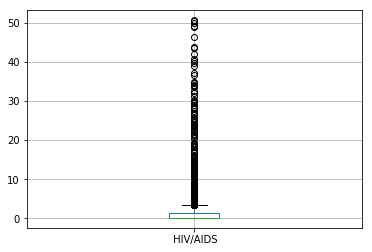

In [13]:
DevelopingDataLifeExpectancy.boxplot(column=[' HIV/AIDS'])

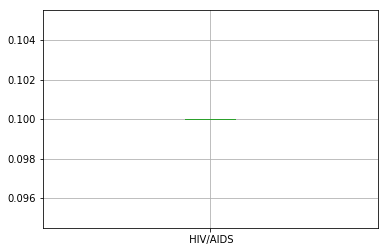

In [14]:
DevelopedDataLifeExpectancy.boxplot(column=[' HIV/AIDS'])

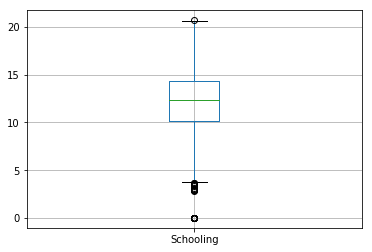

In [15]:
DataLifeExpectancy.boxplot(column=['Schooling'])

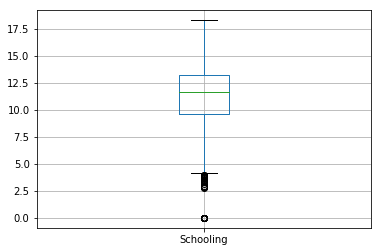

In [ ]:
DevelopingDataLifeExpectancy.boxplot(column=['Schooling'])

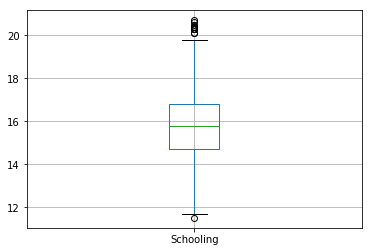

In [ ]:
DevelopedDataLifeExpectancy.boxplot(column=['Schooling'])

### Selecting countries for any further analysis and the data is grouped by Country

In [13]:
life_expectancy_data=PreDataLifeExpectancy
gby_country=PreDataLifeExpectancy.groupby(['Country'])
countries=['India','United States of America','China','Canada','United Kingdom of Great Britain and Northern Ireland','Brazil','Australia','Russian Federation']

### Plots for population of selected countries over years

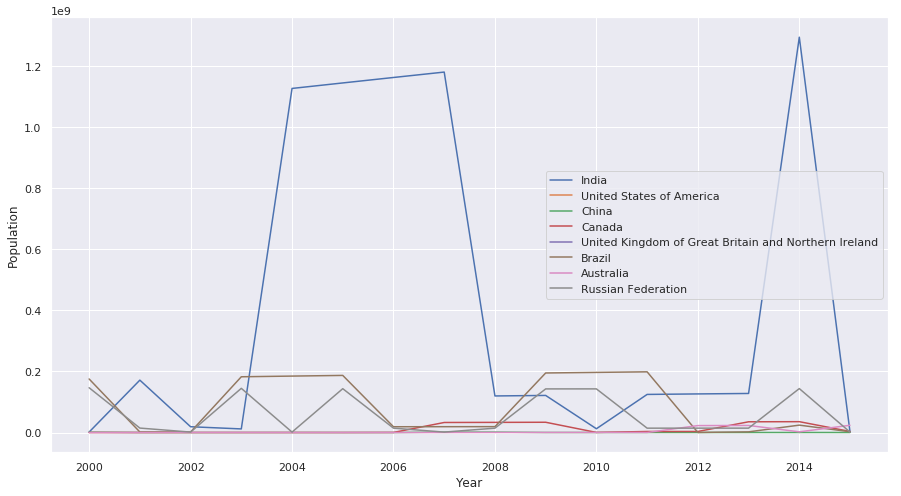

In [12]:
fig= plt.figure(figsize=(15, 8))
ax=fig.add_subplot(111)
for i in countries:
    ax.plot(gby_country.get_group(i)['Year'],gby_country.get_group(i)['Population'])
ax.set(xlabel='Year',ylabel='Population')
ax.legend(countries)

### Life expectancy distributions over years

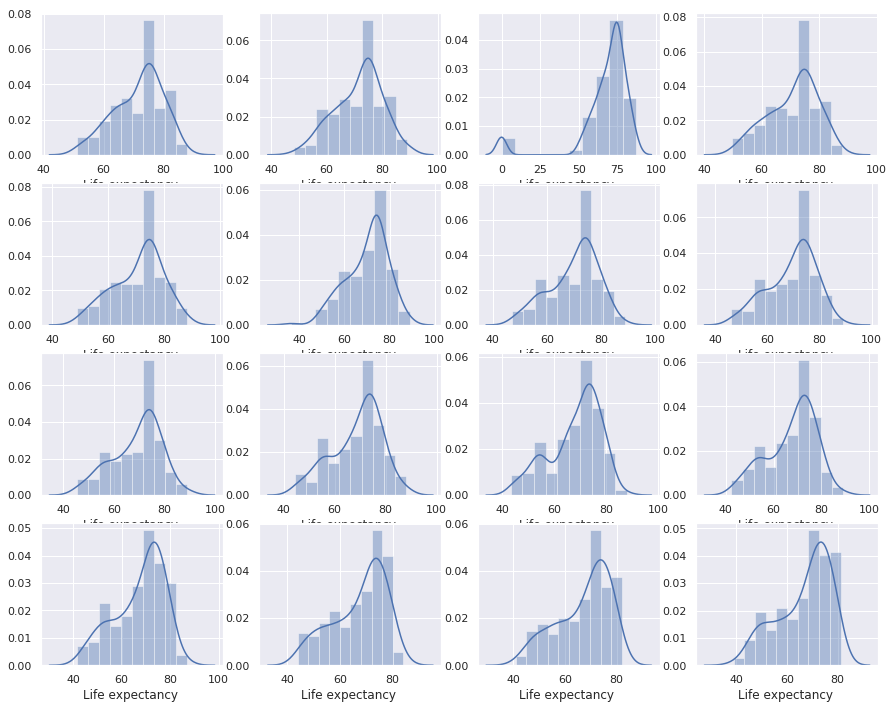

In [14]:
no_of_years=life_expectancy_data.Year.unique().size
fig, axes = plt.subplots(ncols=4, nrows=4,figsize=(15,12))
for i, ax in zip(life_expectancy_data.Year.unique(), axes.flat):
    sns.distplot(life_expectancy_data[life_expectancy_data['Year']==i]['Life expectancy '].fillna(0),norm_hist=False,bins=10,ax=ax)

### Distributions of all the attributes of the data

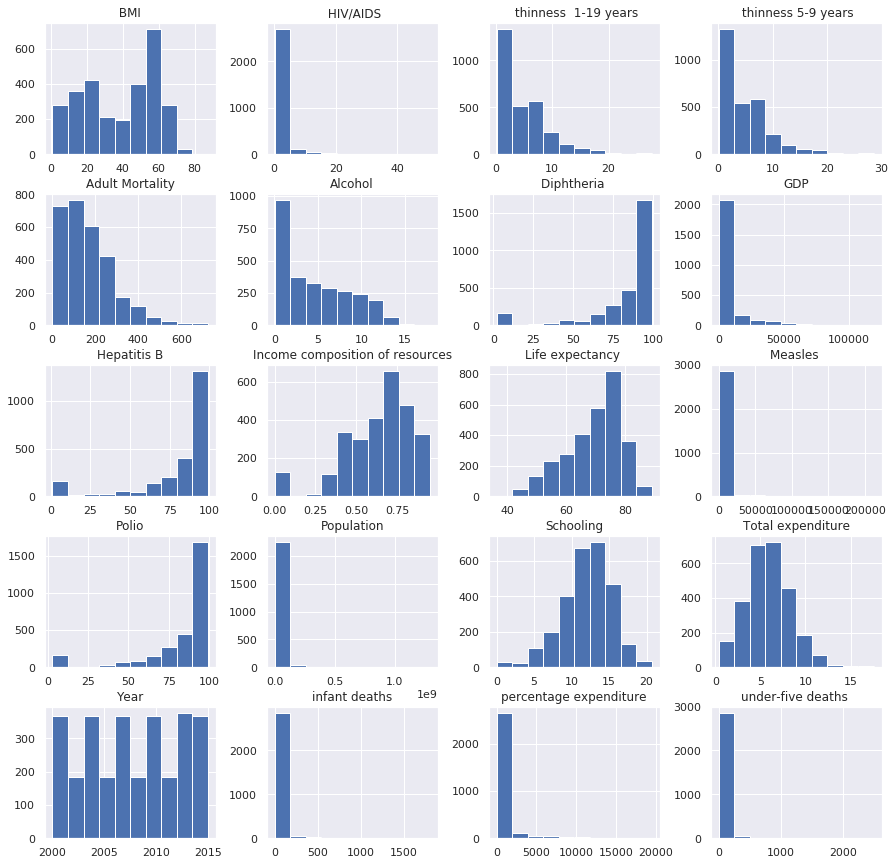

In [15]:
pt=life_expectancy_data.hist(bins=10,figsize=(15,15))

### Pair Plots for Some selected attributes

/home/jayanth/.local/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/jayanth/.local/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


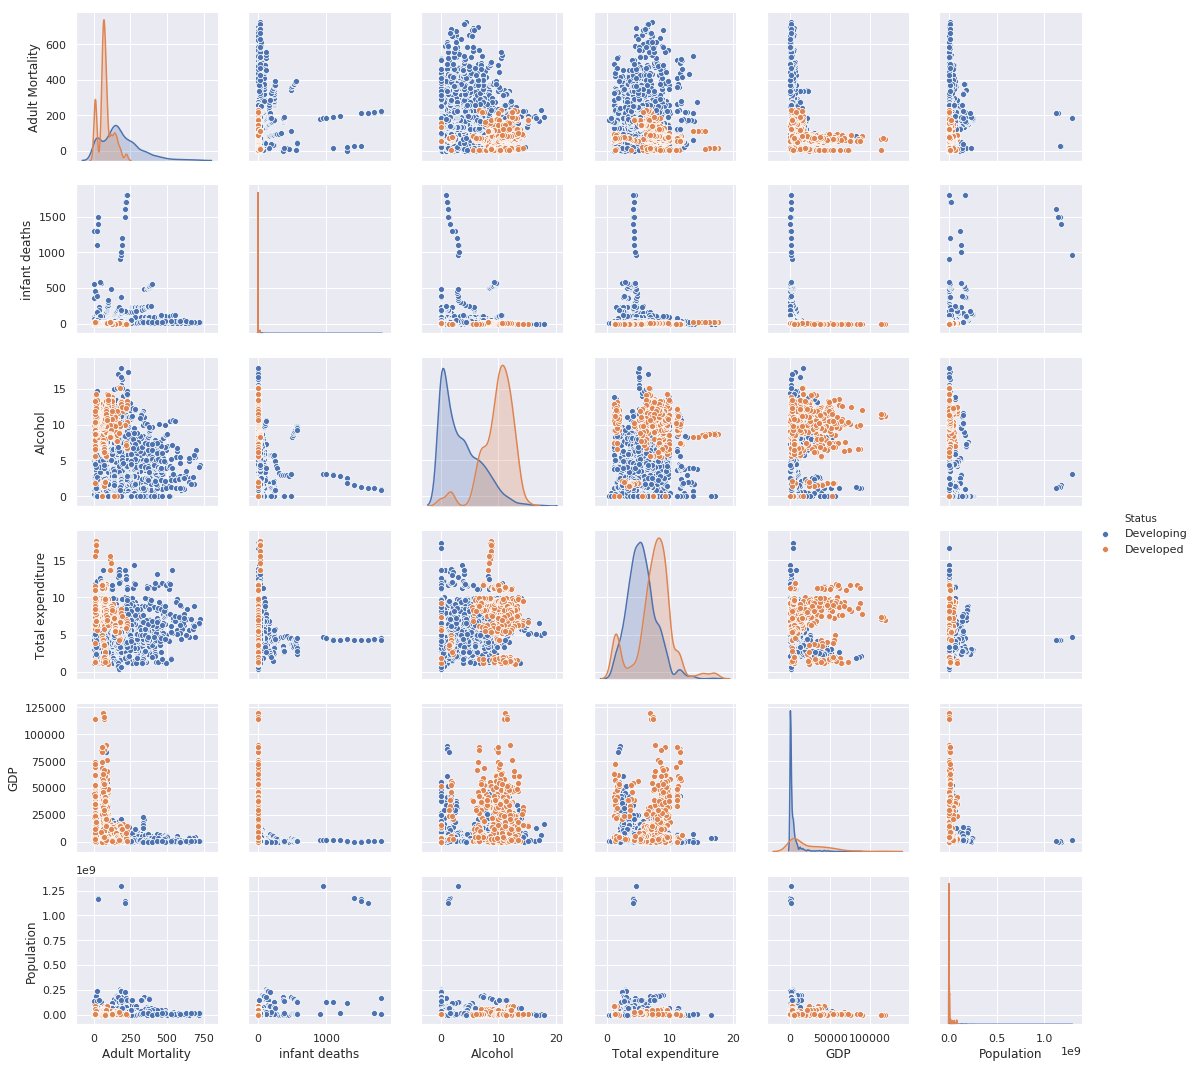

In [16]:
sns.pairplot(life_expectancy_data,vars=['Adult Mortality',
       'infant deaths', 'Alcohol','Total expenditure',
        'GDP', 'Population'],hue='Status')

### Box Plots of some attributes from the data for developed and developing countries

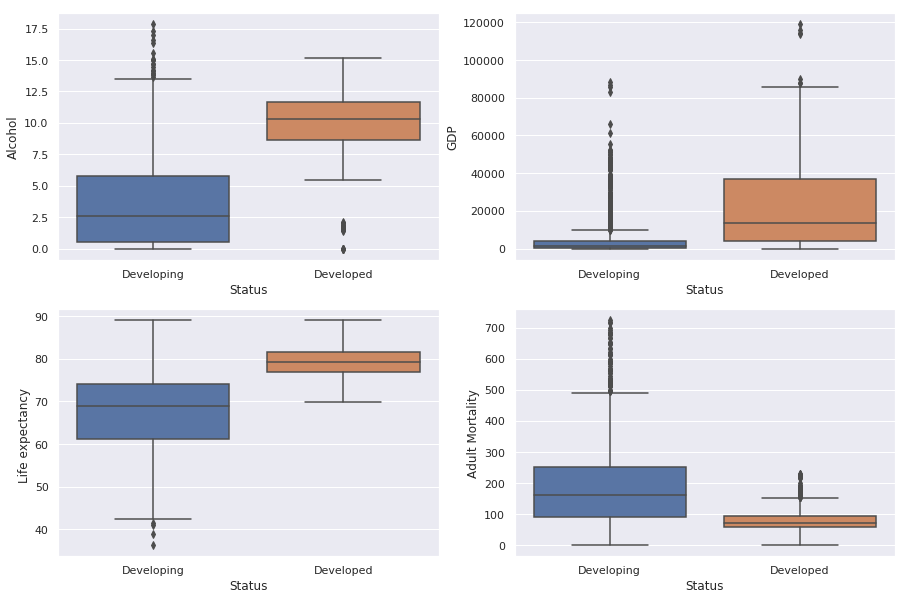

In [18]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
for i,ax in zip(['Alcohol','GDP','Life expectancy ','Adult Mortality'],axes.flat):
    sns.boxplot(x=life_expectancy_data['Status'],y=life_expectancy_data[i],ax=ax)

### Box plots of some attributes for different countries 

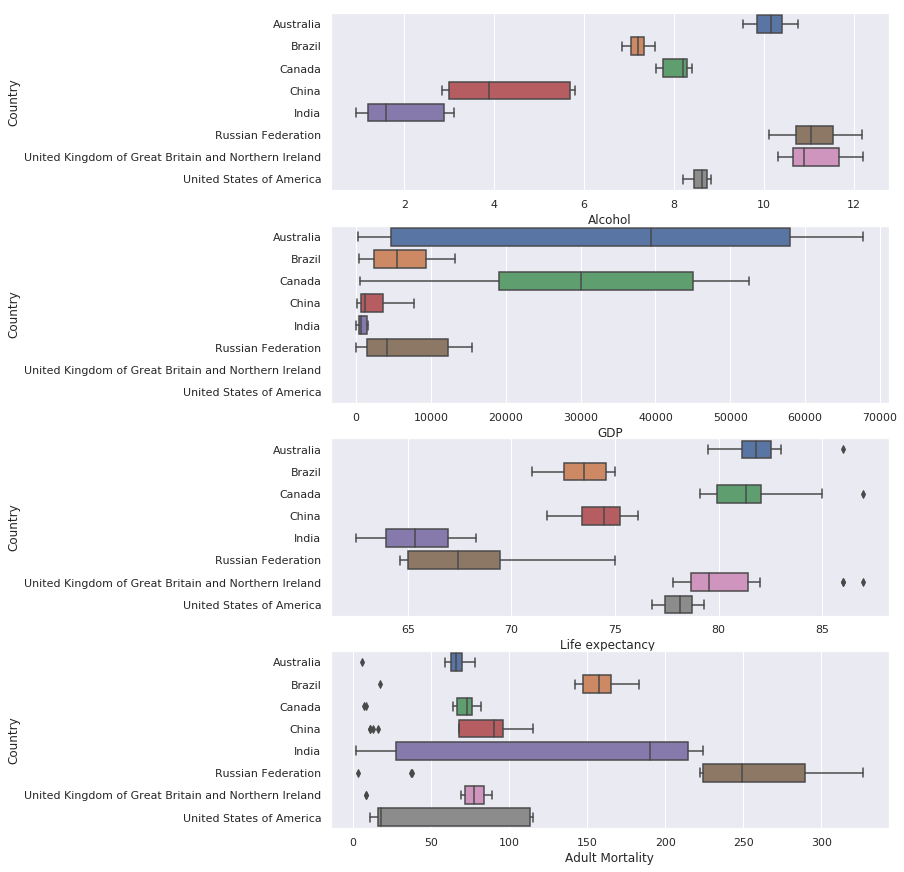

In [19]:
fig,axes=plt.subplots(4,1,figsize=(10,15))
for i,ax in zip(['Alcohol','GDP','Life expectancy ','Adult Mortality'],axes.flat):
    temp=life_expectancy_data[life_expectancy_data['Country'].isin(countries)]
    sns.boxplot(y=temp['Country'],x=temp[i],ax=ax)

### Heat Map ( Correlation Plot )  for the data 

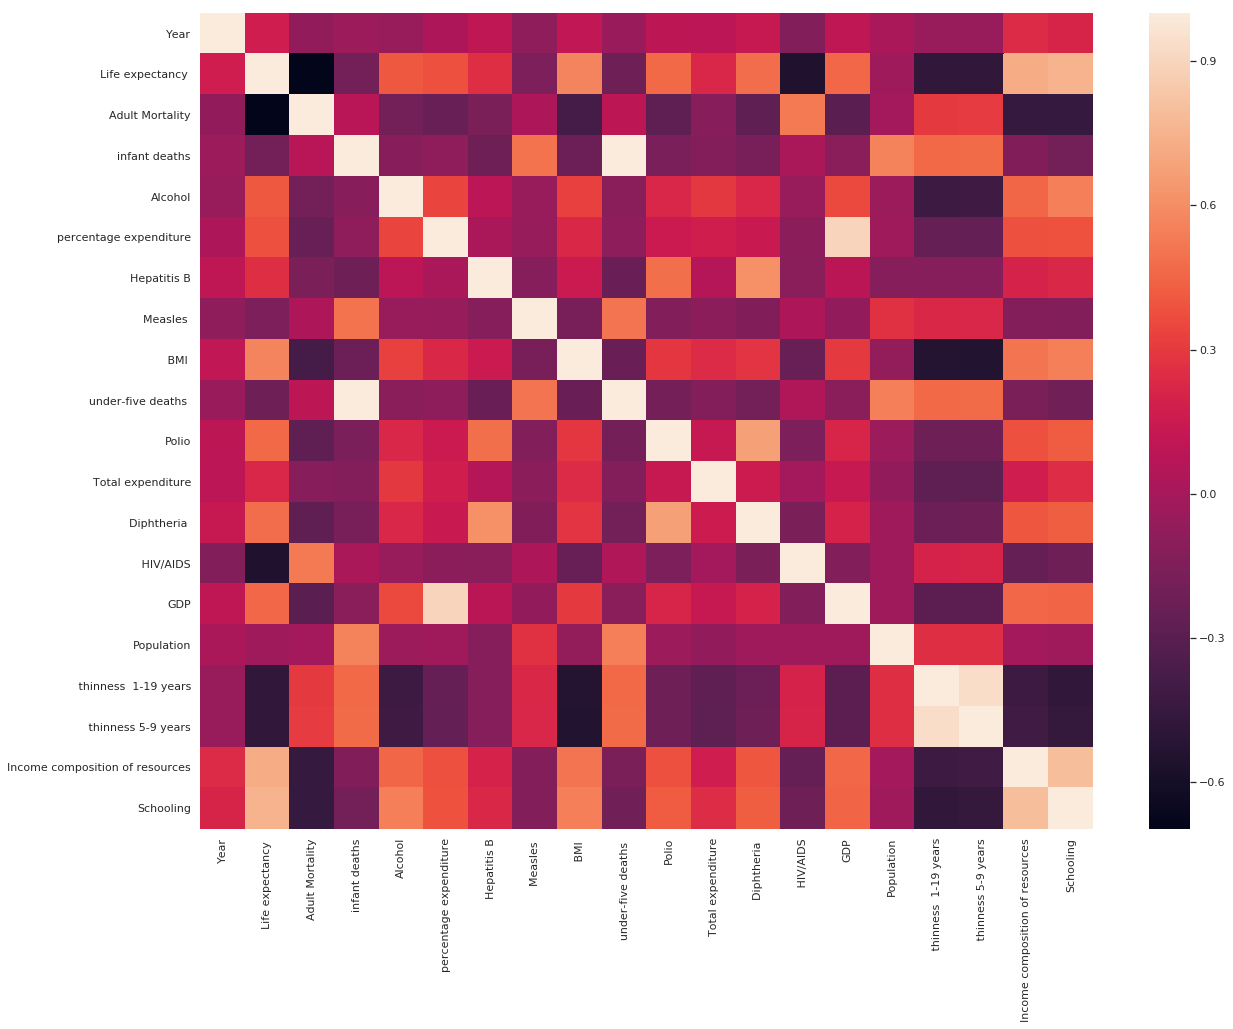

In [20]:
fig,axes=plt.subplots(figsize=(20,15))
corr=life_expectancy_data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

###  Predictive Modelling

In [15]:
PreDataLifeExpectancy = PreDataLifeExpectancy.fillna(0)

In [16]:
# Deep Neural Network
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

TrainY = PreDataLifeExpectancy.pop('Life expectancy ')

TrainX = PreDataLifeExpectancy[['Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]

### Random Forest Regressor

In [53]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(TrainX,TrainY,random_state=2)
rf=RandomForestRegressor().fit(train_x,train_y)
#cross_val_score(rf,TrainX,TrainY,cv=10,n_jobs=10).mean()
mean_absolute_error(rf.predict(test_x),test_y)

/home/jayanth/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.5359863945578236

### Linear Regression 

In [54]:
x_scaled = min_max_scaler.fit_transform(train_x)
lreg=LinearRegression().fit(x_scaled,train_y)
mean_absolute_error(lreg.predict(min_max_scaler.fit_transform(test_x)),test_y)

/home/jayanth/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/jayanth/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


3.869745927961083

### Deep Neural Network for Life Expectancy prediction

In [88]:
model = keras.Sequential(
[
    layers.Dense(512,activation='relu',input_shape=[len(TrainX.keys())]),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(1)
]
)
model.compile(loss='mse',optimizer='adam',metrics=['accuracy','mae','mse'])

In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               9728      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 157,953
Trainable params: 157,953
Non-trainable params: 0
_________________________________________________________________


In [90]:
min_max_scaler =MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_x)
history = model.fit(x_scaled,train_y,epochs=50)
loss,mae,mse = model.evaluate(min_max_scaler.fit_transform(test_x),test_y,scoring='r2')

/home/jayanth/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Epoch 1/50
2203/2203 [==============================] - 1s 263us/sample - loss: 1276.5229 - acc: 4.5393e-04
Epoch 2/50
2203/2203 [==============================] - 0s 137us/sample - loss: 58.4904 - acc: 0.0000e+00
Epoch 3/50
2203/2203 [==============================] - 0s 143us/sample - loss: 28.8001 - acc: 0.0000e+00
Epoch 4/50
2203/2203 [==============================] - 0s 140us/sample - loss: 22.8567 - acc: 0.0000e+00
Epoch 5/50
2203/2203 [==============================] - 0s 141us/sample - loss: 22.0173 - acc: 0.0000e+00
Epoch 6/50
2203/2203 [==============================] - 0s 139us/sample - loss: 19.9594 - acc: 0.0000e+00
Epoch 7/50
2203/2203 [==============================] - 0s 143us/sample - loss: 20.8565 - acc: 0.0000e+00
Epoch 8/50
2203/2203 [==============================] - 0s 140us/sample - loss: 21.0828 - acc: 0.0000e+00
Epoch 9/50
2203/2203 [==============================] - 0s 142us/sample - loss: 18.5026 - acc: 0.0000e+00
Epoch 10/50
2203/2203 [=====================

/home/jayanth/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


TypeError: evaluate() got an unexpected keyword argument 'scoring'

In [92]:
mean_absolute_error(test_y,model.predict(min_max_scaler.fit_transform(test_x)))

/home/jayanth/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


2.675166993343911